# API Demos

The following cells demonstrate fitting ITC experiments using the `pytc` API.  The demos are arranged (roughly) from simpler to more complex fits.  The examples use ITC data in the `pytc/demos` directory.  

In [26]:
%matplotlib inline

## Fit a single-site model to an experiment
Fits binding of calcium onto EDTA. 

# Fit successful? True
# Fit rmsd: 0.6996232985317729
type,name,value,uncertainty,fixed,guess,lower_bound,upper_bound
local,K,demos/ca-edta/tris-01.DH,4.05757e+07,3.43997e-06,float,1.00000e+06,-inf,inf
local,fx_competent,demos/ca-edta/tris-01.DH,9.73940e-01,3.30017e-02,float,1.00000e+00,-inf,inf
local,dH,demos/ca-edta/tris-01.DH,-1.15657e+04,1.19472e-02,float,-4.00000e+03,-inf,inf
local,dilution_heat,demos/ca-edta/tris-01.DH,9.98769e-02,6.55082e-02,float,0.00000e+00,-inf,inf
local,dilution_intercept,demos/ca-edta/tris-01.DH,-6.14026e-01,1.68985e-01,float,0.00000e+00,-inf,inf



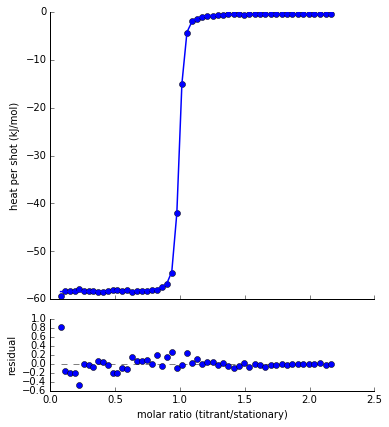

In [27]:
import pytc

# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.GlobalFit()

# --------------------------------------------------------------------
# Load in an experimental data set with a single-site binding model.  Ignore the first two shots
a = pytc.ITCExperiment("demos/ca-edta/tris-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

# Add the experiment to the fitter
g.add_experiment(a)

# --------------------------------------------------------------------
# Fit the data
g.fit()

# --------------------------------------------------------------------
# Show the results
fig, ax = g.plot()
print(g.fit_as_csv)

## Fit a binding-polynomial to an experiment
Fits binding of calcium onto EDTA. 

# Fit successful? True
# Fit rmsd: 0.695865896017026
type,name,value,uncertainty,fixed,guess,lower_bound,upper_bound
local,fx_competent,demos/ca-edta/tris-01.DH,9.73942e-01,5.83216e-02,float,1.00000e+00,-inf,inf
local,dilution_heat,demos/ca-edta/tris-01.DH,9.30885e-02,6.53320e-02,float,0.00000e+00,-inf,inf
local,dH1,demos/ca-edta/tris-01.DH,-1.15678e+04,1.19160e-02,float,-4.00000e+03,-inf,inf
local,beta1,demos/ca-edta/tris-01.DH,4.04174e+07,3.66672e-06,float,1.00000e+07,-inf,inf
local,dilution_intercept,demos/ca-edta/tris-01.DH,-6.01872e-01,1.68531e-01,float,0.00000e+00,-inf,inf



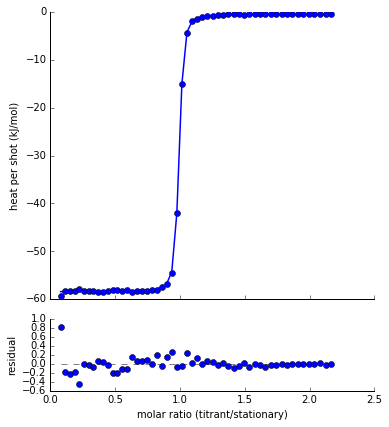

In [28]:
import pytc

# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.GlobalFit()

# --------------------------------------------------------------------
# Load in an experimental data set with a single-site binding model
a = pytc.ITCExperiment("demos/ca-edta/tris-01.DH",pytc.indiv_models.BindingPolynomial,num_sites=1,shot_start=2)
# Add the experiment to the fitter
g.add_experiment(a)
g.update_guess("beta1",1e7,a)

# --------------------------------------------------------------------
# Fit the data
g.fit()

# --------------------------------------------------------------------
# Show the results
fig, ax = g.plot()
print(g.fit_as_csv)



## Change parameter bounds and guesses.  Fix a parameter value.
Fits binding of calcium onto EDTA. This will be a bad fit because we constrained the values to the wrong values.

# Fit successful? True
# Fit rmsd: 194.40449570735106
type,name,value,uncertainty,fixed,guess,lower_bound,upper_bound
local,K,demos/ca-edta/tris-01.DH,1.62751e+07,1.42017e-04,float,1.00000e+03,1.00000e+00,1.00000e+12
local,fx_competent,demos/ca-edta/tris-01.DH,1.00000e+00,0.00000e+00,fixed,1.00000e+00,-inf,inf
local,dH,demos/ca-edta/tris-01.DH,-1.20016e+04,1.97107e-01,float,-4.00000e+03,-inf,inf
local,dilution_heat,demos/ca-edta/tris-01.DH,-1.40195e+00,1.08101e+00,float,0.00000e+00,-inf,inf
local,dilution_intercept,demos/ca-edta/tris-01.DH,2.75549e+00,2.78858e+00,float,0.00000e+00,-inf,inf



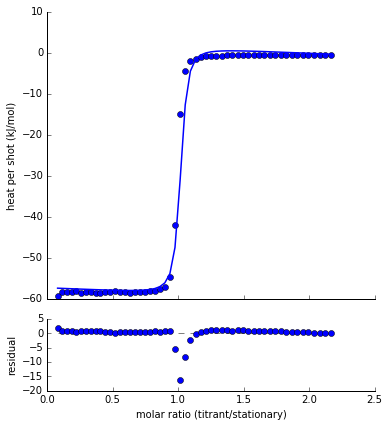

In [29]:
import pytc

# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.GlobalFit()

# --------------------------------------------------------------------
# Load in an experimental data set with a single-site binding model
a = pytc.ITCExperiment("demos/ca-edta/tris-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

# Add the experiment to the fitter
g.add_experiment(a)

# Update bounds and guess for "K".  Then fix dH.
g.update_bounds("K",(1,1e12),a)
g.update_guess("K",1000,a)
g.update_fixed("fx_competent",1.0,a)

# --------------------------------------------------------------------
# Fit the data
g.fit()

# --------------------------------------------------------------------
# Show the results
fig, ax = g.plot()
print(g.fit_as_csv)

## Fit a single-site model to an experiment and blank titration simultaneously
Fits binding of calcium onto EDTA. 

# Fit successful? True
# Fit rmsd: 0.8944232483204893
type,name,value,uncertainty,fixed,guess,lower_bound,upper_bound
global,global_intercept,NA,-3.07477e-01,1.37222e-01,float,0.00000e+00,-inf,inf
global,global_heat,NA,-3.71414e-02,8.74130e-02,float,0.00000e+00,-inf,inf
local,K,demos/ca-edta/tris-01.DH,3.93841e+07,0.00000e+00,float,1.00000e+06,-inf,inf
local,fx_competent,demos/ca-edta/tris-01.DH,9.74056e-01,0.00000e+00,float,1.00000e+00,-inf,inf
local,dH,demos/ca-edta/tris-01.DH,-1.16156e+04,0.00000e+00,float,-4.00000e+03,-inf,inf



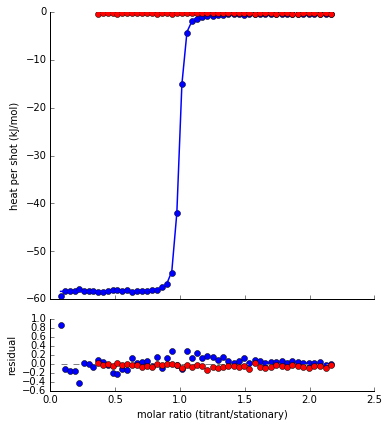

In [30]:
import pytc
%matplotlib inline

# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.GlobalFit()

# --------------------------------------------------------------------
# Load in an experimental data set with a single-site binding model
a = pytc.ITCExperiment("demos/ca-edta/tris-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

# Add the experiment to the fitter.  Then link the dilution heat and
# intercept to global parameters
g.add_experiment(a)
g.link_to_global(a,"dilution_heat","global_heat")
g.link_to_global(a,"dilution_intercept","global_intercept")

# --------------------------------------------------------------------
# Load in a blank titration
b = pytc.ITCExperiment("demos/ca-edta/tris-blank.DH",pytc.indiv_models.Blank,shot_start=10)

# Add a blank titration to the fitter. Then link the dilution heat and
# intercept to global parameters
g.add_experiment(b)
g.link_to_global(b,"dilution_heat","global_heat")
g.link_to_global(b,"dilution_intercept","global_intercept")

# --------------------------------------------------------------------
# Do a global fit to the single-site and blank titrations
g.fit()

# --------------------------------------------------------------------
# Show the results
fig, ax = g.plot()
print(g.fit_as_csv)


## Fit the baseline, specifying to only use the last part of the titration to fit the baseline

# Fit successful? True
# Fit rmsd: 18703.764764865016
type,name,value,uncertainty,fixed,guess,lower_bound,upper_bound
global,global_intercept,NA,-6.36332e-02,7.58617e+02,float,0.00000e+00,-inf,inf
global,global_heat,NA,-3.19107e-02,9.52282e+02,float,0.00000e+00,-inf,inf
local,K,demos/ca-edta/hepes-01.DH,3.80065e+07,0.00000e+00,float,1.00000e+06,-inf,inf
local,fx_competent,demos/ca-edta/hepes-01.DH,1.13893e+00,0.00000e+00,float,1.00000e+00,-inf,inf
local,dH,demos/ca-edta/hepes-01.DH,-4.59166e+03,0.00000e+00,float,-4.00000e+03,-inf,inf



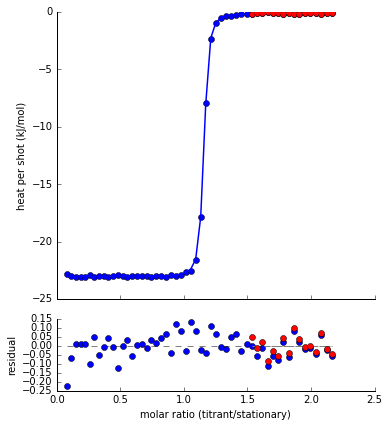

In [34]:
import pytc
%matplotlib inline

# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.GlobalFit()

# --------------------------------------------------------------------
# Load in an experimental data set with a single-site binding model
a = pytc.ITCExperiment("demos/ca-edta/hepes-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

# Add the experiment to the fitter.  Then link the dilution heat and
# intercept to global parameters
g.add_experiment(a)
g.link_to_global(a,"dilution_heat","global_heat")
g.link_to_global(a,"dilution_intercept","global_intercept")

# --------------------------------------------------------------------
# Load in a blank titration
b = pytc.ITCExperiment("demos/ca-edta/hepes-01.DH",pytc.indiv_models.Blank,shot_start=40)

# Add a blank titration to the fitter. Adding it with a large weight 
# makes sure the fitter uses this baseline. Then link the dilution heat and
# intercept to global parameters
g.add_experiment(b, weight=1000) 
g.link_to_global(b,"dilution_heat","global_heat")
g.link_to_global(b,"dilution_intercept","global_intercept")

# --------------------------------------------------------------------
# Do a global fit to the single-site and blank titrations
g.fit()

# --------------------------------------------------------------------
# Show the results
fig, ax = g.plot()
print(g.fit_as_csv)


## Fit a single-site model to three experimental replicate titrations, with a blank titration
Fits binding of calcium onto EDTA. 

# Fit successful? True
# Fit rmsd: 3.602442108693698
type,name,value,uncertainty,fixed,guess,lower_bound,upper_bound
global,global_dH,NA,-4.57708e+03,1.31273e-02,float,-4.00000e+03,-inf,inf
global,global_intercept,NA,-3.85876e-01,1.85669e-01,float,0.00000e+00,-inf,inf
global,global_K,NA,4.20588e+07,2.26730e-06,float,1.00000e+06,-inf,inf
global,global_heat,NA,8.18955e-02,8.01592e-02,float,0.00000e+00,-inf,inf
local,fx_competent,demos/ca-edta/hepes-01.DH,1.13802e+00,1.79027e-02,float,1.00000e+00,-inf,inf
local,fx_competent,demos/ca-edta/hepes-02.DH,1.14381e+00,0.00000e+00,float,1.00000e+00,-inf,inf
local,fx_competent,demos/ca-edta/hepes-03.DH,1.14853e+00,0.00000e+00,float,1.00000e+00,-inf,inf



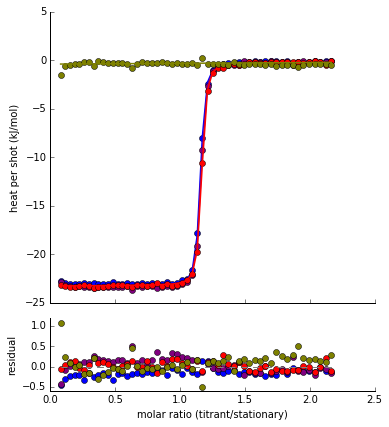

In [24]:
import pytc

# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.GlobalFit()

# --------------------------------------------------------------------
# Load in an experimental data set with a single-site binding model
a = pytc.ITCExperiment("demos/ca-edta/hepes-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

# Add the experiment to the fitter.  Then link the dilution heat, 
# intercept, K, and dH to global parameters
g.add_experiment(a)
g.link_to_global(a,"dilution_heat","global_heat")
g.link_to_global(a,"dilution_intercept","global_intercept")
g.link_to_global(a,"K","global_K")
g.link_to_global(a,"dH","global_dH")

# --------------------------------------------------------------------
# Load in an experimental data set with a single-site binding model
b = pytc.ITCExperiment("demos/ca-edta/hepes-02.DH",pytc.indiv_models.SingleSite,shot_start=2)

# Add the experiment to the fitter.  Then link the dilution heat, 
# intercept, K, and dH to global parameters
g.add_experiment(b)
g.link_to_global(b,"dilution_heat","global_heat")
g.link_to_global(b,"dilution_intercept","global_intercept")
g.link_to_global(b,"K","global_K")
g.link_to_global(b,"dH","global_dH")

# --------------------------------------------------------------------
# Load in an experimental data set with a single-site binding model
c = pytc.ITCExperiment("demos/ca-edta/hepes-03.DH",pytc.indiv_models.SingleSite,shot_start=2)

# Add the experiment to the fitter.  Then link the dilution heat, 
# intercept, K, and dH to global parameters
g.add_experiment(c)
g.link_to_global(c,"dilution_heat","global_heat")
g.link_to_global(c,"dilution_intercept","global_intercept")
g.link_to_global(c,"K","global_K")
g.link_to_global(c,"dH","global_dH")

# --------------------------------------------------------------------
# Load in a blank titration
d = pytc.ITCExperiment("demos/ca-edta/hepes-blank.DH",pytc.indiv_models.Blank,shot_start=2)

# Add a blank titration to the fitter. Then link the dilution heat and
# intercept to global parameters
g.add_experiment(d)
g.link_to_global(d,"dilution_heat","global_heat")
g.link_to_global(d,"dilution_intercept","global_intercept")

# --------------------------------------------------------------------
# Do a global fit to the four titrations
g.fit()

# --------------------------------------------------------------------

# Show the results
fig, ax = g.plot()
print(g.fit_as_csv)

## Fit three experiments in different buffers (with paired blanks) to determine buffer-independent enthalpy and number of protons exchanged on binding
Fits binding of calcium onto EDTA in HEPES, Tris, and Imidazole.

# Fit successful? None
# Fit rmsd: None
type,name,value,uncertainty,fixed,guess,lower_bound,upper_bound
global,tris_heat,NA,-1.91743e-01,0.00000e+00,float,0.00000e+00,-inf,inf
global,imid_heat,NA,2.84834e-01,0.00000e+00,float,0.00000e+00,-inf,inf
global,hepes_intercept,NA,-2.00678e-01,2.78927e-01,float,0.00000e+00,-inf,inf
global,tris_intercept,NA,-4.10839e-02,0.00000e+00,float,0.00000e+00,-inf,inf
global,num_protons,NA,-1.10010e+00,0.00000e+00,float,0.00000e+00,-inf,inf
global,dH_global,NA,7.69382e+02,0.00000e+00,float,-4.00000e+03,-inf,inf
global,global_K,NA,4.33282e+07,0.00000e+00,float,1.00000e+06,-inf,inf
global,imid_intercept,NA,-7.97162e-01,0.00000e+00,float,0.00000e+00,-inf,inf
global,hepes_heat,NA,-3.56663e-02,1.69412e-01,float,0.00000e+00,-inf,inf
local,fx_competent,demos/ca-edta/hepes-01.DH,1.13807e+00,0.00000e+00,float,1.00000e+00,-inf,inf
local,fx_competent,demos/ca-edta/tris-01.DH,9.73764e-01,0.00000e+00,float,1.00000e+00,-inf,inf
local,fx_competent,demos/ca-edta/imid-01.

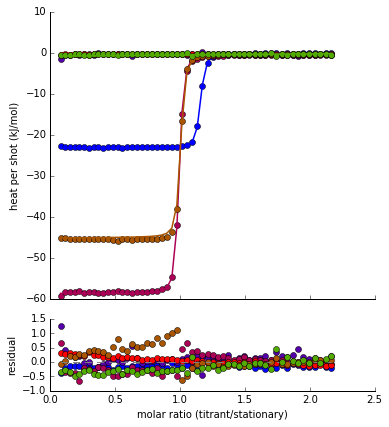

In [11]:
# --------------------------------------------------------------------
# define buffer ionization enthalpies.
# goldberg et al (2002) Journal of Physical and Chemical Reference Data 31 231,  doi: 10.1063/1.1416902
HEPES_IONIZATION_DH = 20.4/4.184*1000
TRIS_IONIZATION_DH = 47.45/4.184*1000
IMID_IONIZATION_DH = 36.64/4.184*1000 

import pytc

# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.global_models.ProtonLinked()

# ------------------------------------------------------------------------------------
# HEPES buffer experiment

hepes = pytc.ITCExperiment("demos/ca-edta/hepes-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

g.add_experiment(hepes,ionization_enthalpy=HEPES_IONIZATION_DH)
g.link_to_global(hepes,"K","global_K")
g.link_to_global(hepes,"dH","dH_global")
g.link_to_global(hepes,"dilution_heat","hepes_heat")
g.link_to_global(hepes,"dilution_intercept","hepes_intercept")

# ------------------------------------------------------------------------------------
# HEPES buffer blank

hepes_blank = pytc.ITCExperiment("demos/ca-edta/hepes-blank.DH",pytc.indiv_models.Blank,shot_start=2)

g.add_experiment(hepes_blank,ionization_enthalpy=HEPES_IONIZATION_DH)
g.link_to_global(hepes_blank,"dilution_heat","hepes_heat")
g.link_to_global(hepes_blank,"dilution_intercept","hepes_intercept")

# ------------------------------------------------------------------------------------
# Tris buffer experiment

tris = pytc.ITCExperiment("demos/ca-edta/tris-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

g.add_experiment(tris,ionization_enthalpy=TRIS_IONIZATION_DH)
g.link_to_global(tris,"K","global_K")
g.link_to_global(tris,"dH","dH_global")
g.link_to_global(tris,"dilution_heat","tris_heat")
g.link_to_global(tris,"dilution_intercept","tris_intercept")

# ------------------------------------------------------------------------------------
# Tris buffer blank

tris_blank = pytc.ITCExperiment("demos/ca-edta/tris-blank.DH",pytc.indiv_models.Blank,shot_start=2)

g.add_experiment(tris_blank,ionization_enthalpy=TRIS_IONIZATION_DH)
g.link_to_global(tris_blank,"dilution_heat","tris_heat")
g.link_to_global(tris_blank,"dilution_intercept","tris_intercept")

# ------------------------------------------------------------------------------------
# Imidazole buffer experiment

imid = pytc.ITCExperiment("demos/ca-edta/imid-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

g.add_experiment(imid,ionization_enthalpy=IMID_IONIZATION_DH)
g.link_to_global(imid,"K","global_K")
g.link_to_global(imid,"dH","dH_global")
g.link_to_global(imid,"dilution_heat","imid_heat")
g.link_to_global(imid,"dilution_intercept","imid_intercept")

# ------------------------------------------------------------------------------------
# Imidazole buffer blank

imid_blank = pytc.ITCExperiment("demos/ca-edta/imid-blank.DH",pytc.indiv_models.Blank,shot_start=2)

g.add_experiment(imid_blank,ionization_enthalpy=IMID_IONIZATION_DH)
g.link_to_global(imid_blank,"dilution_heat","imid_heat")
g.link_to_global(imid_blank,"dilution_intercept","imid_intercept")

# --------------------------------------------------------------------
# Do a global fit
g.fit()

# Show the results
fig, ax = g.plot()
print(g.fit_as_csv)


# Fit successful? None
# Fit rmsd: None
type,name,value,uncertainty,fixed,guess,lower_bound,upper_bound
global,tris_heat,NA,-1.35785e-01,0.00000e+00,float,0.00000e+00,-inf,inf
global,imid_heat,NA,2.28959e-01,0.00000e+00,float,0.00000e+00,-inf,inf
global,hepes_intercept,NA,-2.12756e-01,2.41024e-01,float,0.00000e+00,-inf,inf
global,tris_intercept,NA,-9.34949e-02,0.00000e+00,float,0.00000e+00,-inf,inf
global,num_protons,NA,-1.09732e+00,1.18991e+00,float,0.00000e+00,-inf,inf
global,dH_global,NA,7.37685e+02,1.70398e-02,float,-4.00000e+03,-inf,inf
global,global_K,NA,4.25894e+07,3.61107e-06,float,1.00000e+06,-inf,inf
global,imid_intercept,NA,-6.99228e-01,0.00000e+00,float,0.00000e+00,-inf,inf
global,hepes_heat,NA,-1.17486e-02,1.46391e-01,float,0.00000e+00,-inf,inf
local,fx_competent,demos/ca-edta/hepes-01.DH,1.13790e+00,3.46499e-02,float,1.00000e+00,-inf,inf
local,fx_competent,demos/ca-edta/hepes-02.DH,1.14368e+00,0.00000e+00,float,1.00000e+00,-inf,inf
local,fx_competent,demos/ca-edta/hepes-0

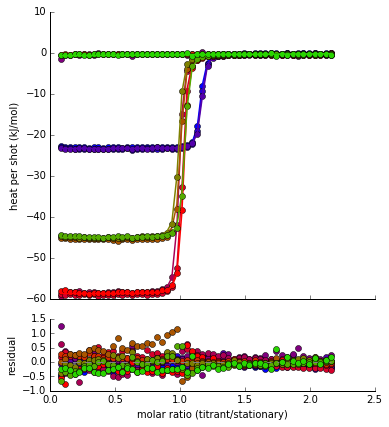

In [37]:
# --------------------------------------------------------------------
# define buffer ionization enthalpies.
# goldberg et al (2002) Journal of Physical and Chemical Reference Data 31 231,  doi: 10.1063/1.1416902
HEPES_IONIZATION_DH = 20.4/4.184*1000
TRIS_IONIZATION_DH = 47.45/4.184*1000
IMID_IONIZATION_DH = 36.64/4.184*1000 

import pytc

# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.global_models.ProtonLinked()

# ------------------------------------------------------------------------------------
# HEPES buffer experiment

hepes1 = pytc.ITCExperiment("demos/ca-edta/hepes-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

g.add_experiment(hepes1,ionization_enthalpy=HEPES_IONIZATION_DH)
g.link_to_global(hepes1,"K","global_K")
g.link_to_global(hepes1,"dH","dH_global")
g.link_to_global(hepes1,"dilution_heat","hepes_heat")
g.link_to_global(hepes1,"dilution_intercept","hepes_intercept")


hepes2 = pytc.ITCExperiment("demos/ca-edta/hepes-02.DH",pytc.indiv_models.SingleSite,shot_start=2)

g.add_experiment(hepes2,ionization_enthalpy=HEPES_IONIZATION_DH)
g.link_to_global(hepes2,"K","global_K")
g.link_to_global(hepes2,"dH","dH_global")
g.link_to_global(hepes2,"dilution_heat","hepes_heat")
g.link_to_global(hepes2,"dilution_intercept","hepes_intercept")

hepes3 = pytc.ITCExperiment("demos/ca-edta/hepes-03.DH",pytc.indiv_models.SingleSite,shot_start=2)

g.add_experiment(hepes3,ionization_enthalpy=HEPES_IONIZATION_DH)
g.link_to_global(hepes3,"K","global_K")
g.link_to_global(hepes3,"dH","dH_global")
g.link_to_global(hepes3,"dilution_heat","hepes_heat")
g.link_to_global(hepes3,"dilution_intercept","hepes_intercept")

hepes_blank = pytc.ITCExperiment("demos/ca-edta/hepes-blank.DH",pytc.indiv_models.Blank,shot_start=2)

g.add_experiment(hepes_blank,ionization_enthalpy=HEPES_IONIZATION_DH)
g.link_to_global(hepes_blank,"dilution_heat","hepes_heat")
g.link_to_global(hepes_blank,"dilution_intercept","hepes_intercept")


# ------------------------------------------------------------------------------------
# Tris buffer experiment

tris1 = pytc.ITCExperiment("demos/ca-edta/tris-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

g.add_experiment(tris1,ionization_enthalpy=TRIS_IONIZATION_DH)
g.link_to_global(tris1,"K","global_K")
g.link_to_global(tris1,"dH","dH_global")
g.link_to_global(tris1,"dilution_heat","tris_heat")
g.link_to_global(tris1,"dilution_intercept","tris_intercept")

tris2 = pytc.ITCExperiment("demos/ca-edta/tris-02.DH",pytc.indiv_models.SingleSite,shot_start=2)

g.add_experiment(tris2,ionization_enthalpy=TRIS_IONIZATION_DH)
g.link_to_global(tris2,"K","global_K")
g.link_to_global(tris2,"dH","dH_global")
g.link_to_global(tris2,"dilution_heat","tris_heat")
g.link_to_global(tris2,"dilution_intercept","tris_intercept")

tris3 = pytc.ITCExperiment("demos/ca-edta/tris-03.DH",pytc.indiv_models.SingleSite,shot_start=2)

g.add_experiment(tris3,ionization_enthalpy=TRIS_IONIZATION_DH)
g.link_to_global(tris3,"K","global_K")
g.link_to_global(tris3,"dH","dH_global")
g.link_to_global(tris3,"dilution_heat","tris_heat")
g.link_to_global(tris3,"dilution_intercept","tris_intercept")


tris_blank = pytc.ITCExperiment("demos/ca-edta/tris-blank.DH",pytc.indiv_models.Blank,shot_start=2)

g.add_experiment(tris_blank,ionization_enthalpy=TRIS_IONIZATION_DH)
g.link_to_global(tris_blank,"dilution_heat","tris_heat")
g.link_to_global(tris_blank,"dilution_intercept","tris_intercept")


# ------------------------------------------------------------------------------------
# Imidazole buffer experiment

imid1 = pytc.ITCExperiment("demos/ca-edta/imid-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

g.add_experiment(imid1,ionization_enthalpy=IMID_IONIZATION_DH)
g.link_to_global(imid1,"K","global_K")
g.link_to_global(imid1,"dH","dH_global")
g.link_to_global(imid1,"dilution_heat","imid_heat")
g.link_to_global(imid1,"dilution_intercept","imid_intercept")

imid2 = pytc.ITCExperiment("demos/ca-edta/imid-02.DH",pytc.indiv_models.SingleSite,shot_start=2)

g.add_experiment(imid2,ionization_enthalpy=IMID_IONIZATION_DH)
g.link_to_global(imid2,"K","global_K")
g.link_to_global(imid2,"dH","dH_global")
g.link_to_global(imid2,"dilution_heat","imid_heat")
g.link_to_global(imid2,"dilution_intercept","imid_intercept")

imid3 = pytc.ITCExperiment("demos/ca-edta/imid-03.DH",pytc.indiv_models.SingleSite,shot_start=2)

g.add_experiment(imid3,ionization_enthalpy=IMID_IONIZATION_DH)
g.link_to_global(imid3,"K","global_K")
g.link_to_global(imid3,"dH","dH_global")
g.link_to_global(imid3,"dilution_heat","imid_heat")
g.link_to_global(imid3,"dilution_intercept","imid_intercept")

imid_blank = pytc.ITCExperiment("demos/ca-edta/imid-blank.DH",pytc.indiv_models.Blank,shot_start=2)

g.add_experiment(imid_blank,ionization_enthalpy=IMID_IONIZATION_DH)
g.link_to_global(imid_blank,"dilution_heat","imid_heat")
g.link_to_global(imid_blank,"dilution_intercept","imid_intercept")

# --------------------------------------------------------------------
# Do a global fit
g.fit()

# Show the results
fig, ax = g.plot()
print(g.fit_as_csv)


## Fit single-site binding curves to experiments at two temperatures to extract the change in heat capacity for binding.
Fits binding of Zn to human S100A14 at 10 and 25 C. 

/home/harmsm/work/programming/git-clones/pytc/pytc/indiv_models/single_site.py:65: RuntimeWarning: invalid value encountered in sqrt
  ST = (b - np.sqrt((b)**2 - 4*S_conc_corr*self._T_conc))/2


# Fit successful? None
# Fit rmsd: None
type,name,value,uncertainty,fixed,guess,lower_bound,upper_bound
global,dCp,NA,-1.03217e+04,5.18213e-03,float,0.00000e+00,-inf,inf
global,dH_global,NA,1.01635e+05,1.02334e-03,float,-4.00000e+03,-inf,inf
local,K,demos/temp-dependence/10C.DH,1.13821e+04,0.00000e+00,float,1.00000e+06,-inf,inf
local,fx_competent,demos/temp-dependence/10C.DH,1.06838e+00,0.00000e+00,float,1.00000e+00,-inf,inf
local,dilution_heat,demos/temp-dependence/10C.DH,-9.55594e-01,0.00000e+00,float,0.00000e+00,-inf,inf
local,dilution_intercept,demos/temp-dependence/10C.DH,6.69636e+00,0.00000e+00,float,0.00000e+00,-inf,inf
local,K,demos/temp-dependence/25C.DH,1.58412e+02,3.11457e-02,float,1.00000e+06,-inf,inf
local,fx_competent,demos/temp-dependence/25C.DH,1.10000e+00,3.64390e-01,float,1.00000e+00,9.00000e-01,1.10000e+00
local,dilution_heat,demos/temp-dependence/25C.DH,-4.71583e-01,1.52060e-01,float,0.00000e+00,-inf,inf
local,dilution_intercept,demos/temp-dependence/25C.DH,9.11890e

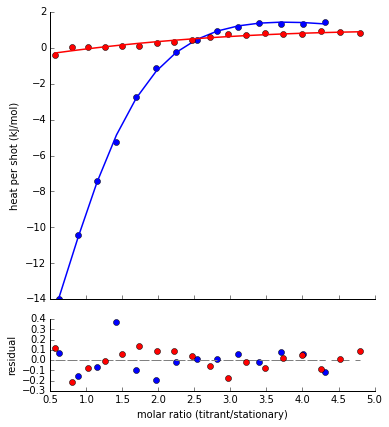

In [14]:
import pytc

# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.global_models.TempDependence()

t10 = pytc.ITCExperiment("demos/temp-dependence/10C.DH",pytc.indiv_models.SingleSite,shot_start=2)
g.add_experiment(t10)
g.link_to_global(t10,"dH","dH_global")

t25 = pytc.ITCExperiment("demos/temp-dependence/25C.DH",pytc.indiv_models.SingleSite,shot_start=2)
g.add_experiment(t25)
g.link_to_global(t25,"dH","dH_global")

g.update_bounds("fx_competent",(0.9,1.1),t25)


# Do fit
g.fit()

# Show the results
fit, ax = g.plot()
print(g.fit_as_csv)


## Fit binding with competitors at varying concentrations to back out individual binding constants

/home/harmsm/work/programming/git-clones/pytc/pytc/indiv_models/single_site.py:65: RuntimeWarning: invalid value encountered in sqrt
  ST = (b - np.sqrt((b)**2 - 4*S_conc_corr*self._T_conc))/2


# Fit successful? None
# Fit rmsd: None
type,name,value,uncertainty,fixed,guess,lower_bound,upper_bound
global,dCp,NA,7.32860e+05,5.01723e-02,float,0.00000e+00,-inf,inf
global,dH_global,NA,-1.83289e+07,1.00336e-02,float,-4.00000e+03,-inf,inf
local,K,demos/temp-dependence/10C.DH,3.59324e+03,0.00000e+00,float,1.00000e+06,-inf,inf
local,fx_competent,demos/temp-dependence/10C.DH,7.55246e-01,0.00000e+00,float,1.00000e+00,-inf,inf
local,dH,demos/temp-dependence/10C.DH,-1.10103e+04,0.00000e+00,float,-4.00000e+03,-inf,inf
local,dilution_heat,demos/temp-dependence/10C.DH,-2.16042e+00,0.00000e+00,float,0.00000e+00,-inf,inf
local,dilution_intercept,demos/temp-dependence/10C.DH,1.45974e+01,0.00000e+00,float,0.00000e+00,-inf,inf
local,fx_competent,demos/ca-edta/hepes-01.DH,1.13856e+00,1.16360e-02,float,1.00000e+00,-inf,inf
local,K,demos/temp-dependence/25C.DH,8.02535e+08,0.00000e+00,float,1.00000e+06,-inf,inf
local,fx_competent,demos/temp-dependence/25C.DH,5.08912e-01,0.00000e+00,float,1.00000e+00,

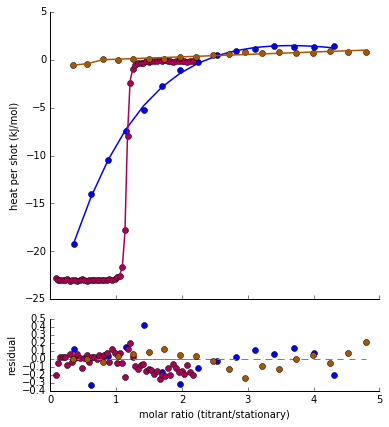

In [15]:
import pytc

# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.global_models.TempDependence()

# ------------------------------------------------------------------------------------
# HEPES buffer experiment

t10 = pytc.ITCExperiment("demos/temp-dependence/10C.DH",pytc.indiv_models.SingleSite)
g.add_experiment(t10)
g.link_to_global(hepes,"dH","dH_global")

t25 = pytc.ITCExperiment("demos/temp-dependence/25C.DH",pytc.indiv_models.SingleSite)
g.add_experiment(t25)
g.link_to_global(hepes,"dH","dH_global")


# Do fit
g.fit()

# Show the results
g.plot()
print(g.fit_as_csv)